The goal of this notebook is to test a simple quantum circuit to swap two cubits.

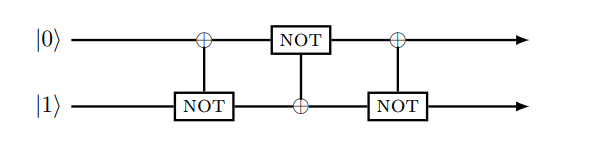

In [4]:
## Initial setup
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

import os
from dotenv import load_dotenv

load_dotenv()
API_TOKEN = os.getenv("API_TOKEN")
service = QiskitRuntimeService(channel="ibm_quantum", token=API_TOKEN)
backend = service.backend(name="ibm_rensselaer")


In [ ]:
# 2 qubit system
qc = qiskit.QuantumCircuit(2, 2)  # creates a quantum register 'q' with 2 qubits and a classical register 'c' with 2 bits

# Initialize second qubit to |1>
qc.initialize([0, 1], 1)

# CNOT gate (control: qubit 0, target: qubit 1)
qc.cx(0, 1)

# CNOT gate (control: qubit 1, target: qubit 0)
qc.cx(1, 0)

# CNTO gate (control: qubit 0, target: qubit 1)
qc.cx(0, 1)

# Measure qubits
qc.measure([0, 1], [0, 1])

qc.draw(output="mpl")

In [5]:
# Execute the circuit
qc = qiskit.transpile(qc, backend)

sampler = Sampler(backend)
job = sampler.run([qc], shots=10**4)
result = job.result()[0]

In [14]:
# get counts from the classical register
counts = result.data.c.get_counts()
print(counts)

{'01': 9754, '11': 119, '00': 76, '10': 51}


As expected, in most cases, the qubits switched values, with q_0 ending as 1 and q_1 ending as 0.

In [24]:
# noise-free simulation results
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import EstimatorV2 as Estimator
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

simulator = AerSimulator()
pass_manager = generate_preset_pass_manager(3, simulator)
transpiled_circuit = pass_manager.run(qc)

simulation_job = simulator.run(transpiled_circuit, shots=1000)

simulation_result = simulation_job.result()
simulation_counts = simulation_result.get_counts(transpiled_circuit)

# Print and plot the results
print("Measurement output:", simulation_counts)

Measurement output: {'01': 1000}
